## Linear Regression

We implement a linear regression model on example data (ex1data1.mat).

- We the use the Mean Squared error cost function and its partial derivatives as our gradient descent module.
- Then we calculate the parameters (a, b) in a line function y = ax+b via linear regression model.
- Finally we will plot the output line and the input data in the same figure. Plot the cost curve.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
#plt.style.available # To check all available matplotlib styles
plt.style.use('seaborn-paper')

### Loading the dataset

In [2]:
X_feat = []
y_target = []

with open('data/ex1data1.mat', 'r') as ex1_d1:
    for line in ex1_d1:
        line = line.strip().split(',')
        X_feat.append(float(line[0]))
        y_target.append(float(line[1]))
        
# Converting feature and target data to np arrays
X_feat, y_target = np.array(X_feat), np.array(y_target)
print("No. of samples in dataset:", len(X_feat))

No. of samples in dataset: 97


### Visualizing the dataset

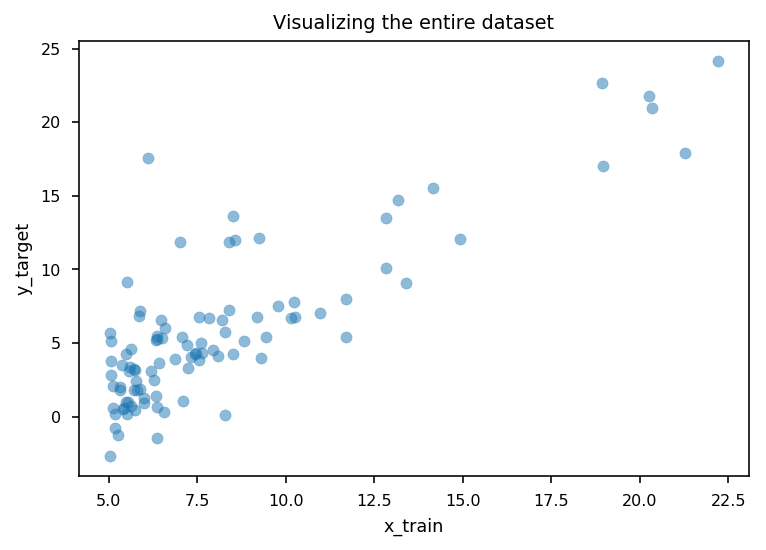

In [3]:
plt.scatter(X_feat, y_target, alpha=0.5)
plt.xlabel('x_train')
plt.ylabel('y_target')
plt.title("Visualizing the entire dataset")
plt.show()

### Creating our model with utility functions

In [10]:
# Prediction linear or hypothesis function
def y_pred(X_feat, theta_0, theta_1):
    '''theta_0 and theta_1 are the parameters for this linear model which represent 
        the y-intercept and slope of the straight line.'''
    return theta_0 + (theta_1*X_feat)

# Cost function Mean Squared Error
def mse(y_true, y_pred):
    '''y_true and y_pred must be numpy arrays for efficient calculation'''
    return (((y_pred - y_true)**2).mean())/2

# Func to plot the dataset repr by xf X_feat and yt y_target
# t0 and t1 repr parameters for the fit line
def plotter(xf, yt, t0, t1, color='b'):
    plt.scatter(xf, yt, alpha=0.5) # dataset plotted in a scatterplot
    plt.plot(xf, y_pred(xf, t0, t1), color=color) # fit line plot
    plt.xlabel('x_train')
    plt.ylabel('y_target')
    plt.title("Dataset with best fit line")
    plt.show()
    plt.clf()  

class LinearRegressModel:
    def __init__(self):
        # initialize the two params of the model to some random values
        self.theta_0 = np.random.random() * 10
        self.theta_1 = np.random.random()
        self.mse_loss = [] # for plotting the loss values over time

    def train(self, X_feat, y_target, color='b',learning_rate=0.5, epochs=200):
        '''func to train the linear regress model
            X_feat and y_target must be np arrays'''
        number_xdata = X_feat.size
        number_ydata = y_target.size
        if (number_xdata != number_ydata):
            raise("Test and target data dimensions do not match")
        
        for epoch in range(epochs):
            for xf, yt in zip(X_feat, y_target):
                '''Batch Gradient Descent Operation as we use our entire feat 
                and target set for calculating MSE for each epoch
                The Gradient Descent MSE func for linear regression has no local minima'''
                
                # Simultaneous update of parameters
                dm_dt0 = (1/number_xdata) * (y_pred(xf, self.theta_0, self.theta_1) - yt)
                dm_dt1 = (1/number_xdata) * xf * (y_pred(xf, self.theta_0, self.theta_1) - yt)
                # Gradient descent update
                self.theta_0 -= learning_rate * dm_dt0
                self.theta_1 -= learning_rate * dm_dt1  
            
            # Calculating the MSE loss and saving it to the mse_loss arr
            self.mse_loss.append(mse(y_target, y_pred(X_feat, self.theta_0, self.theta_1)))
            if epoch % 20 == 0:
                plotter(X_feat, y_target, self.theta_0, self.theta_1, color=color)
                time.sleep(1)
                
    def plot_mse_loss(self, color):
        # Plotting the loss overtime
        plt.title("loss overtime")
        plt.xlabel("epochs")
        plt.ylabel("MSE loss")
        plt.plot(self.mse_loss, color=color)
        plt.show()
        

#### Linear Regression model trained with different data sets

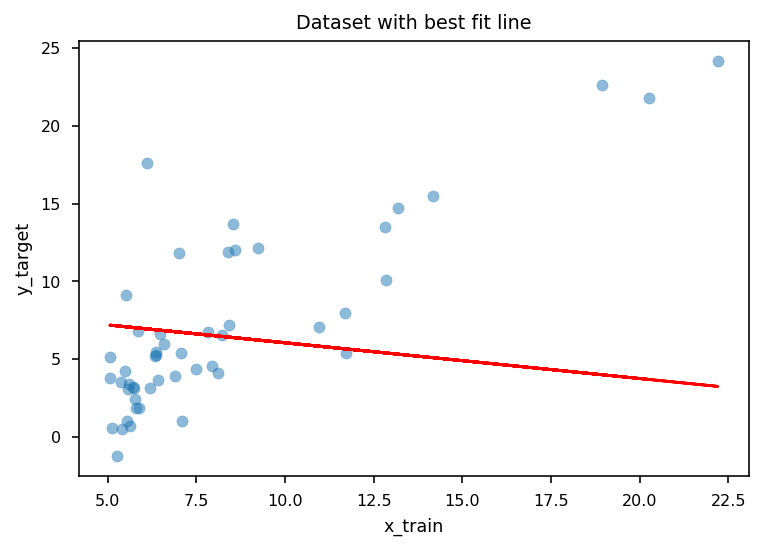

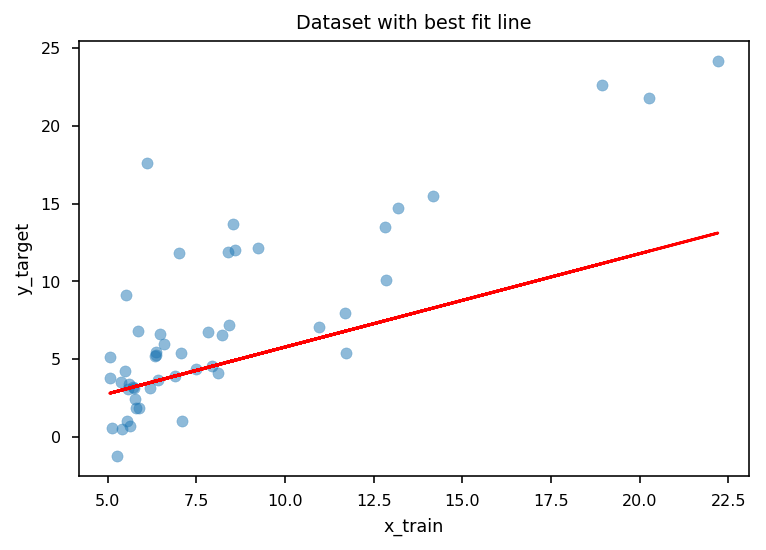

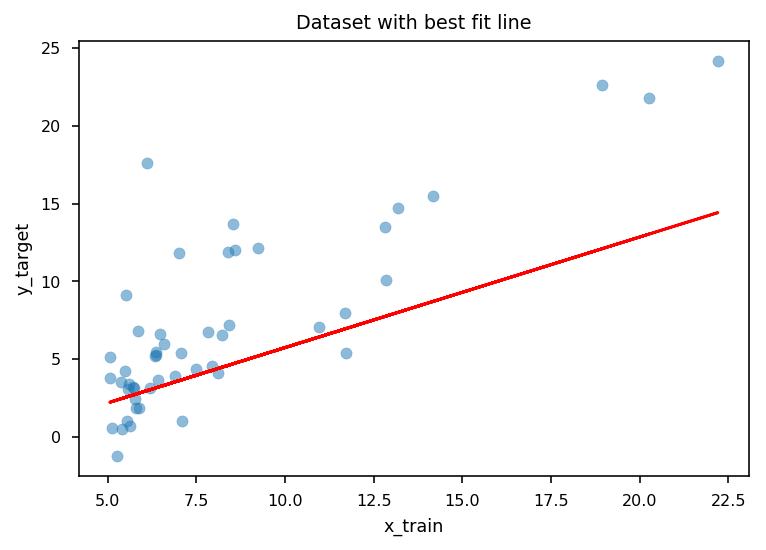

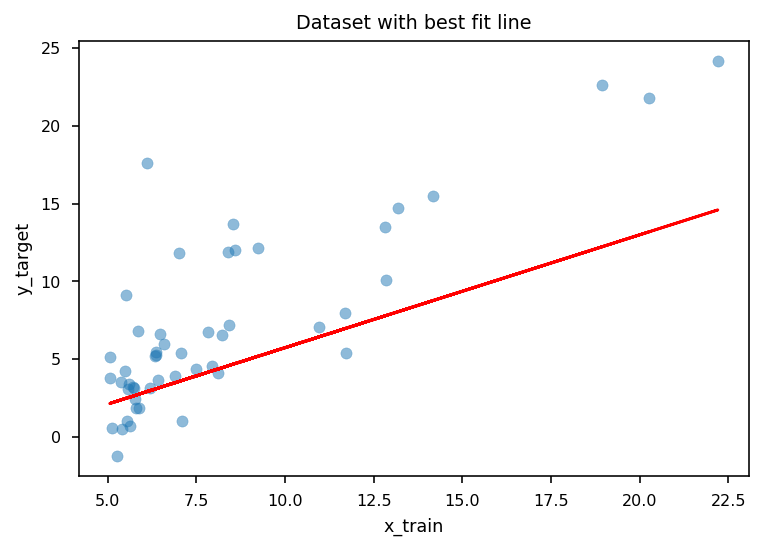

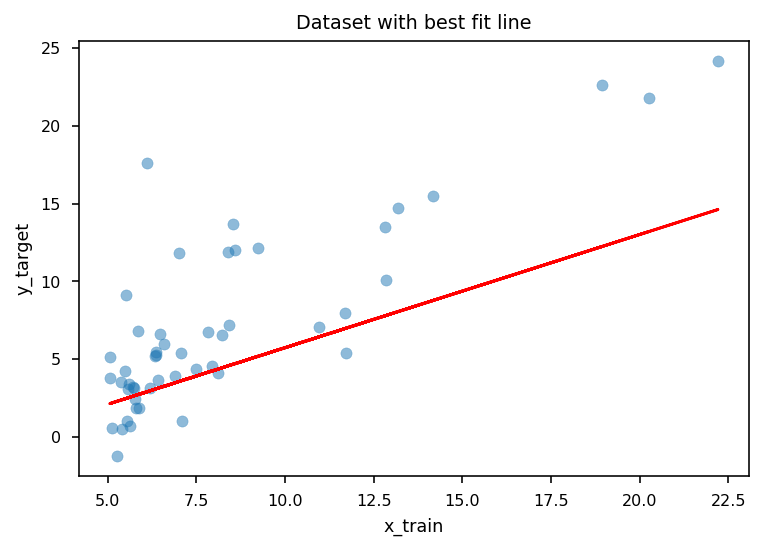

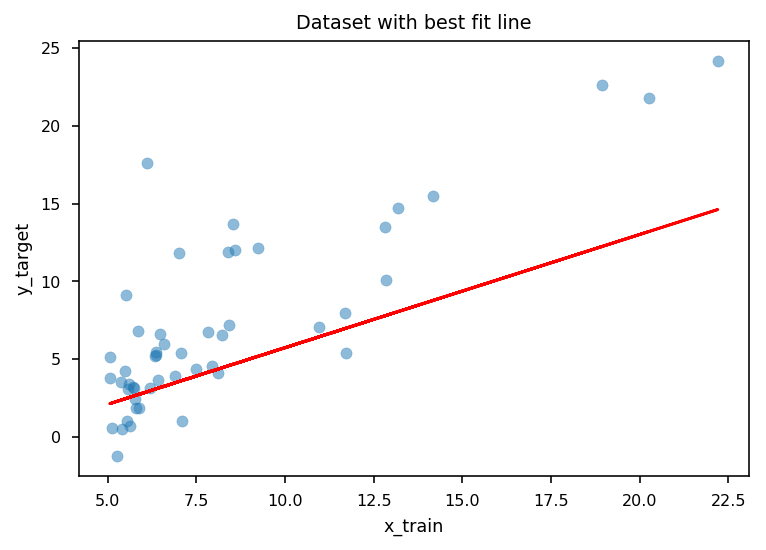

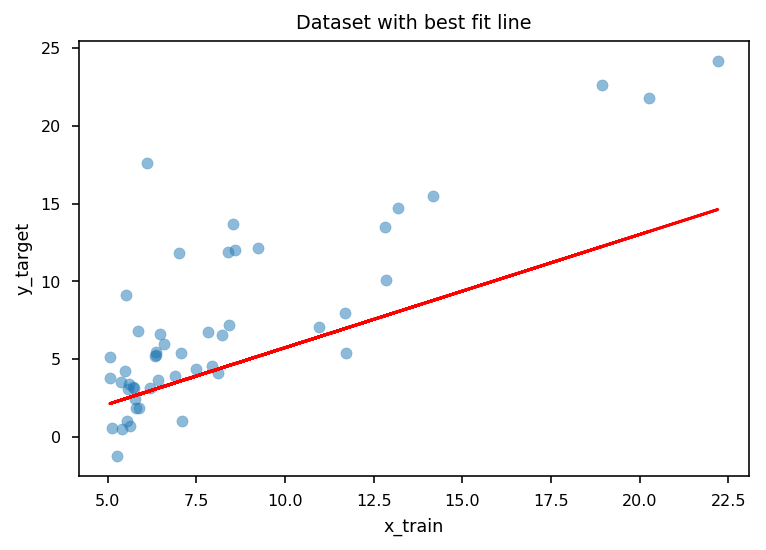

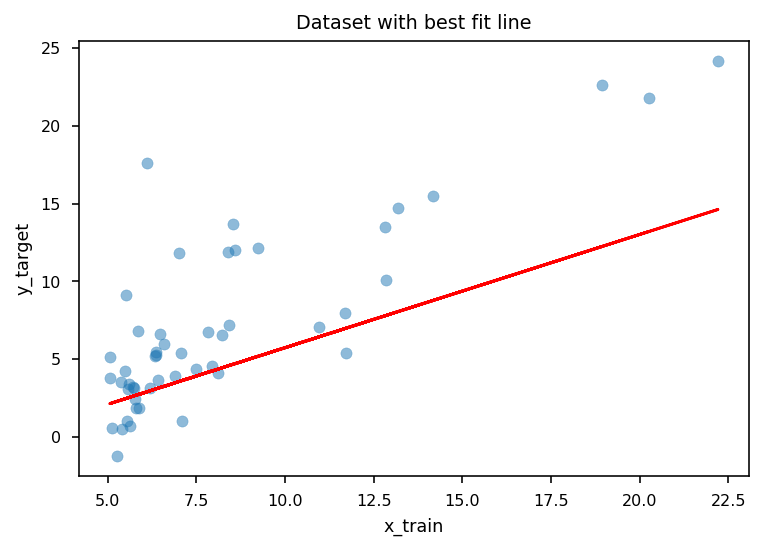

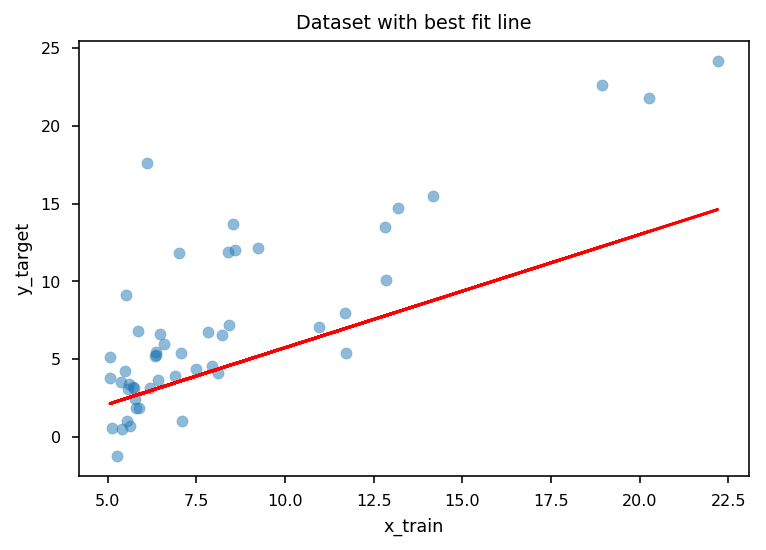

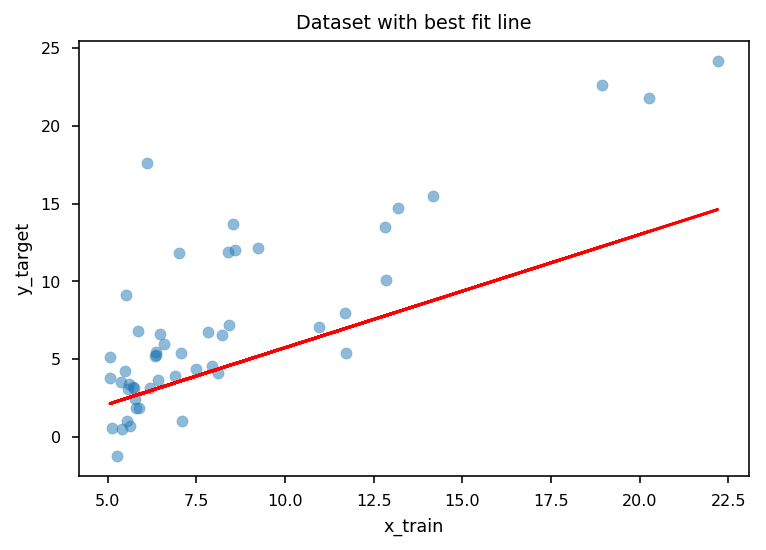

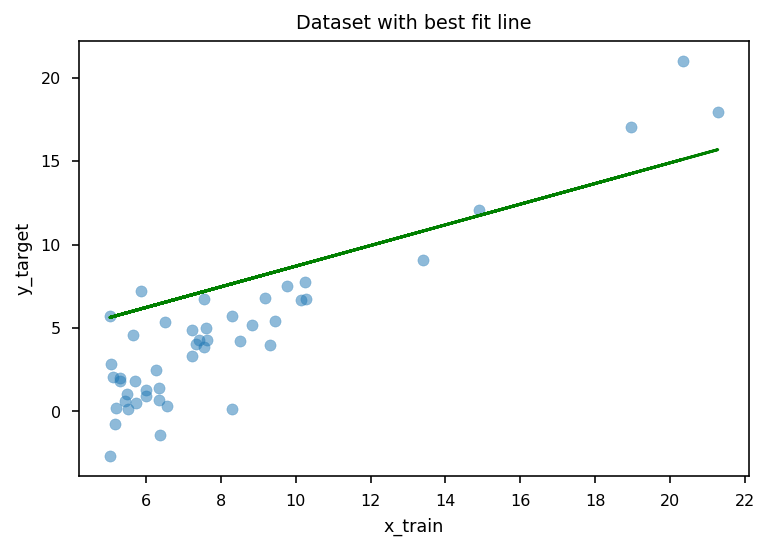

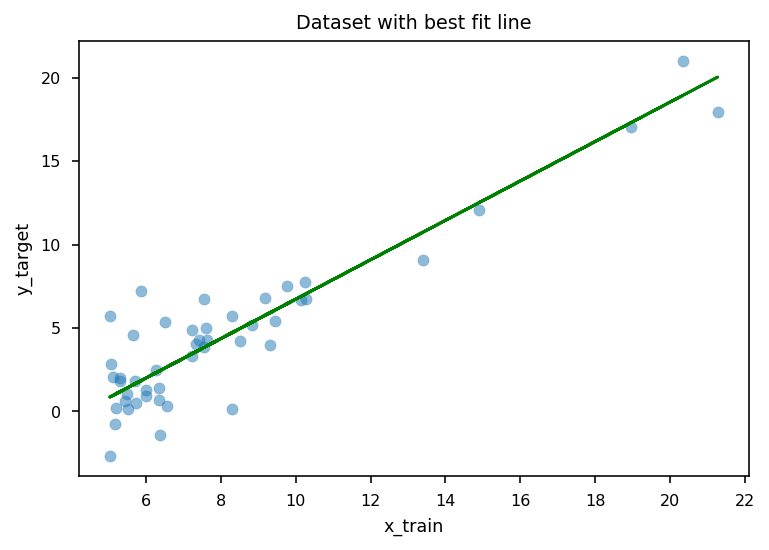

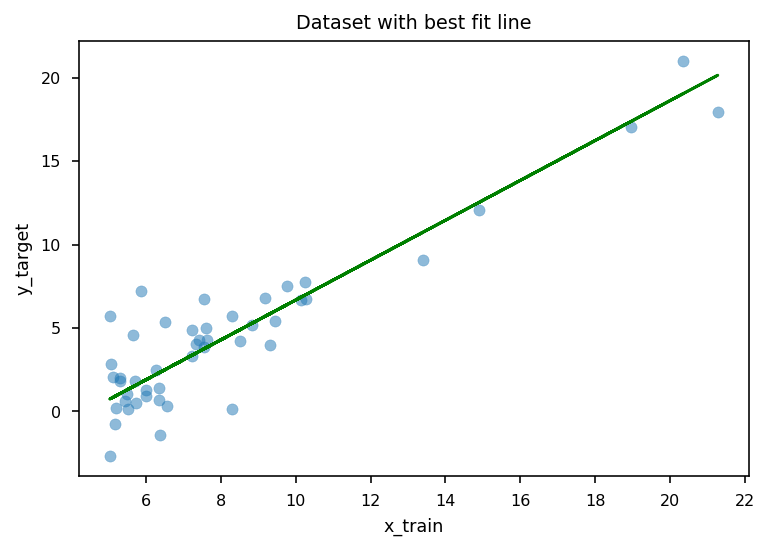

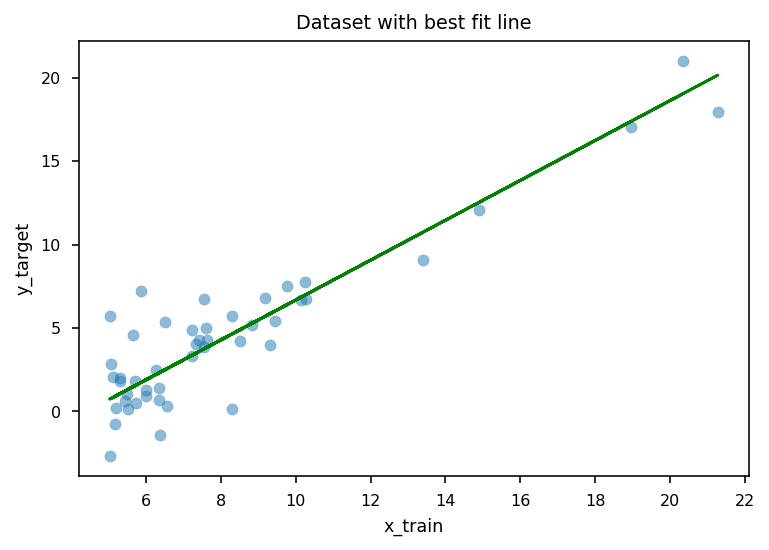

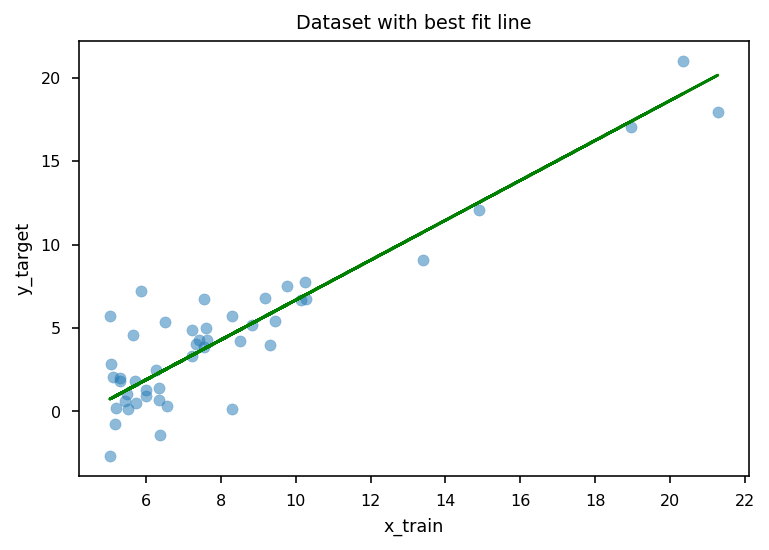

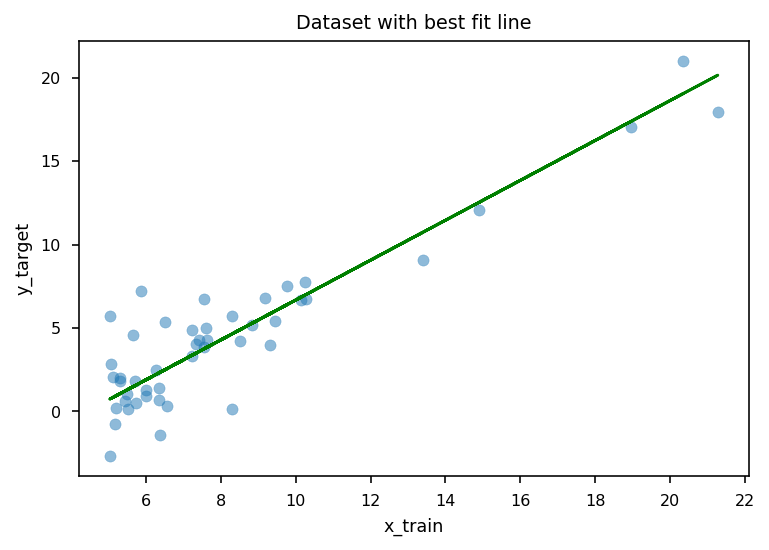

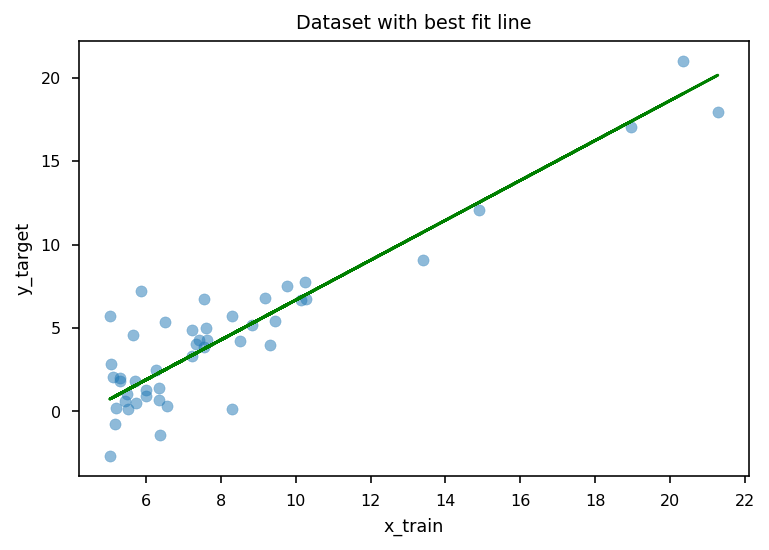

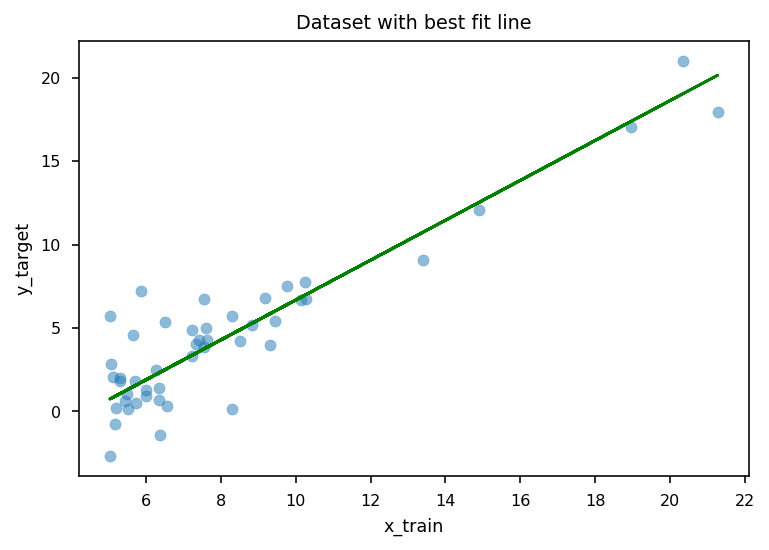

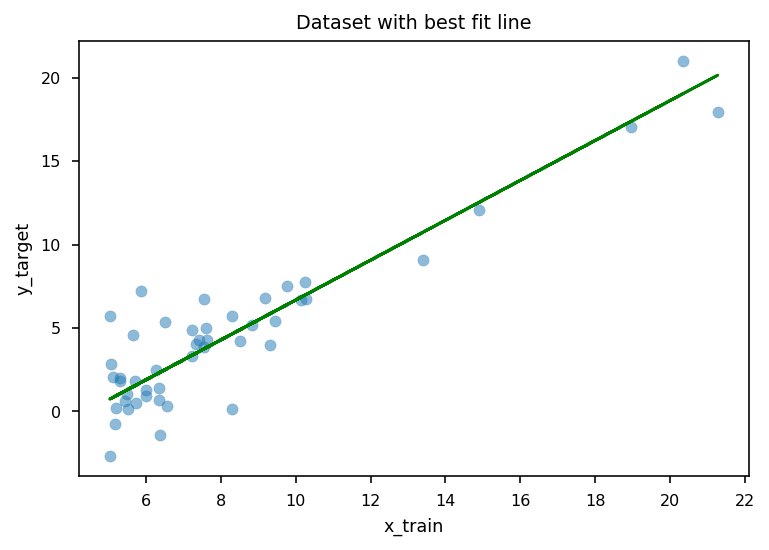

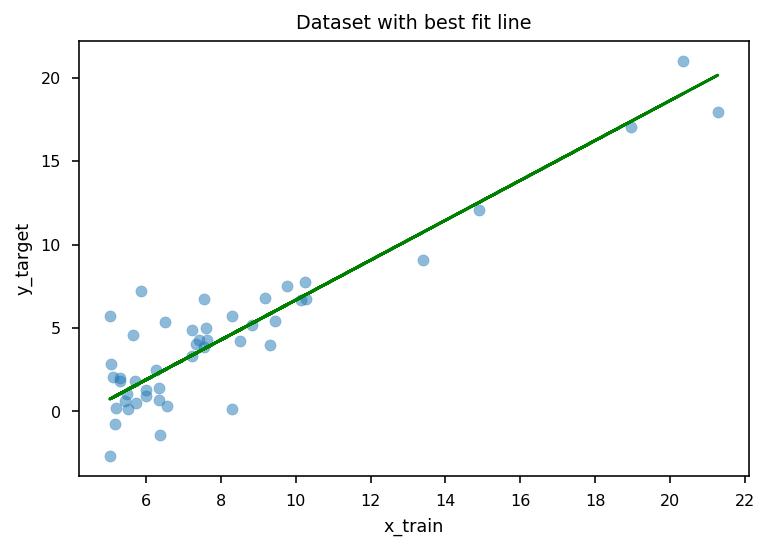

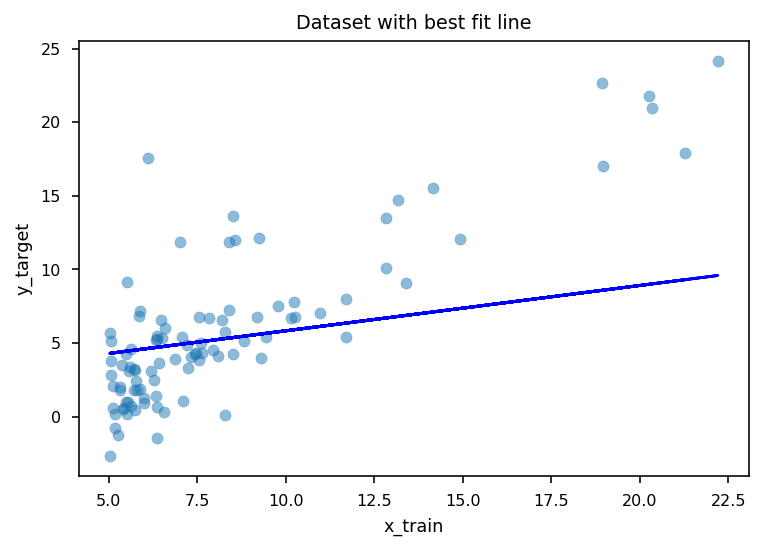

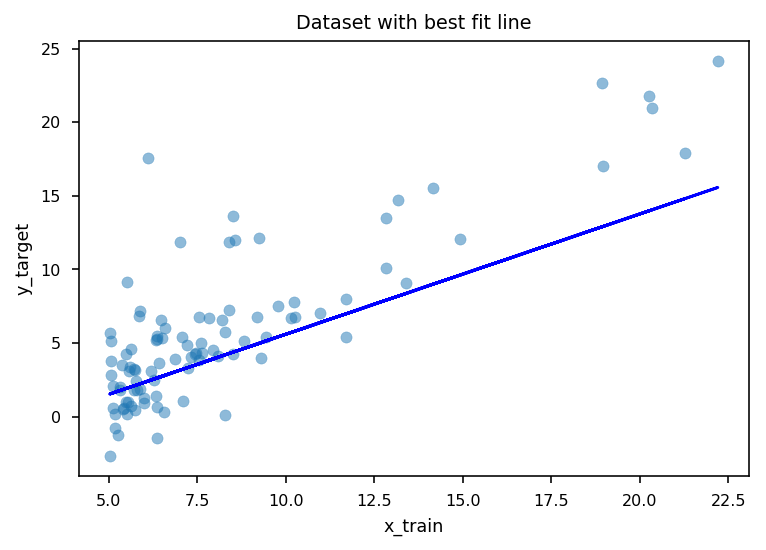

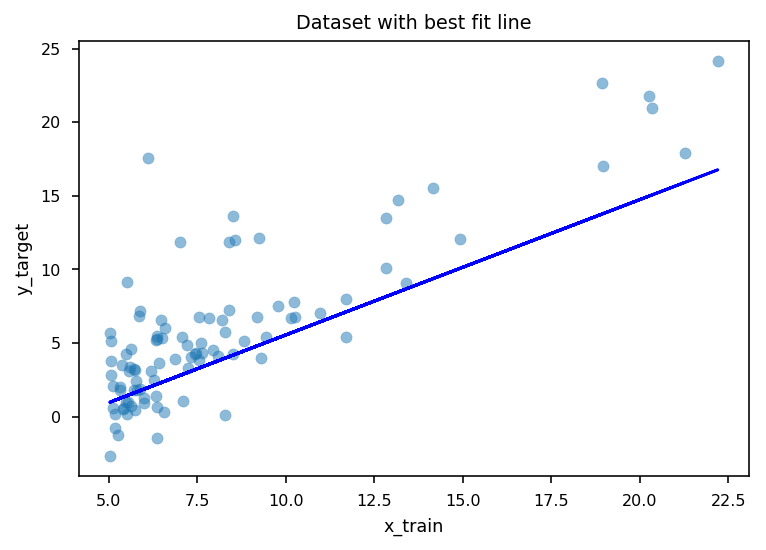

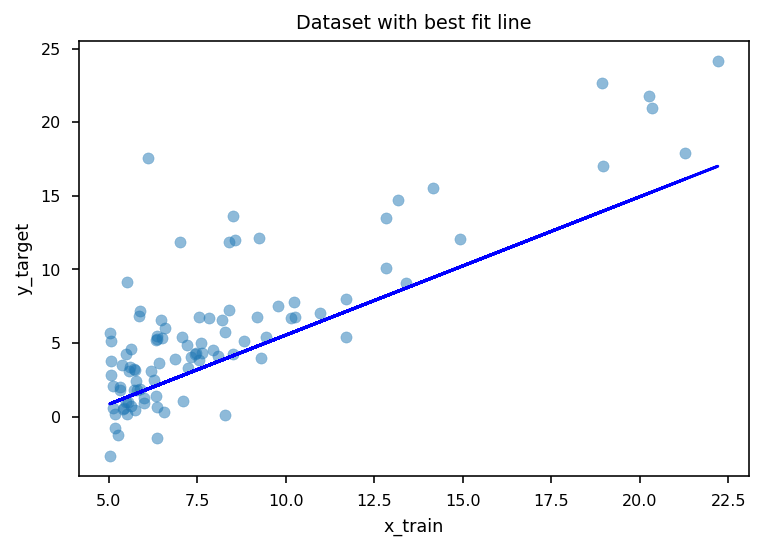

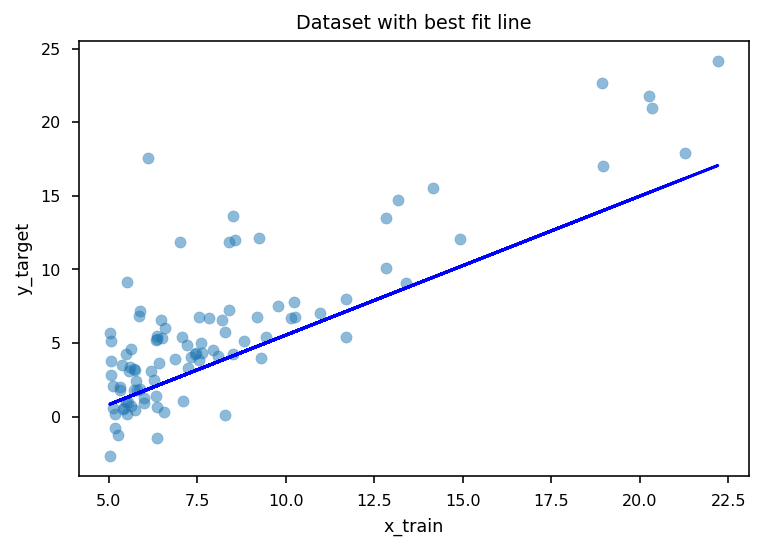

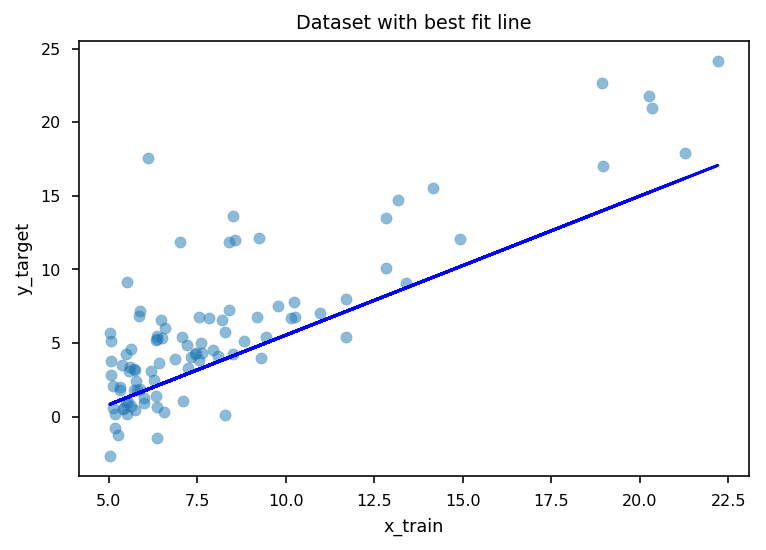

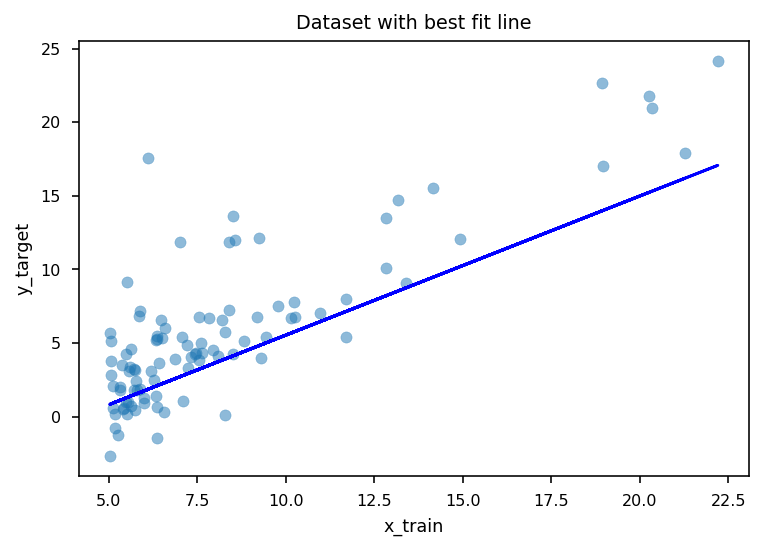

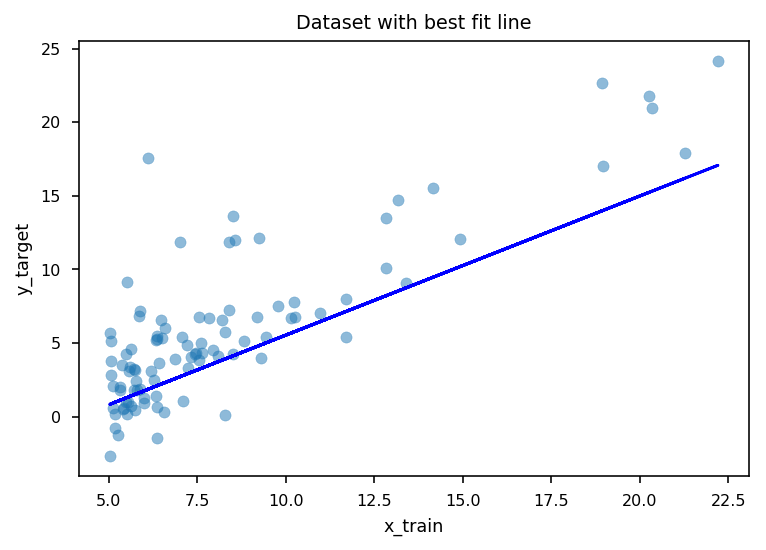

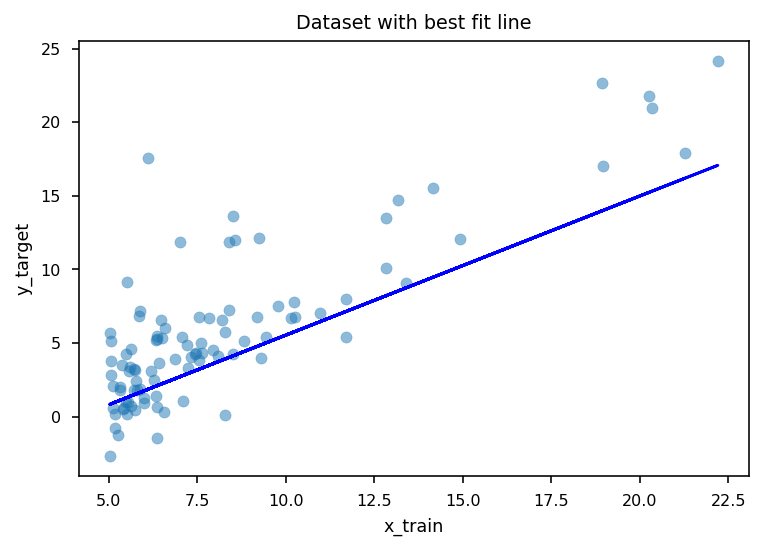

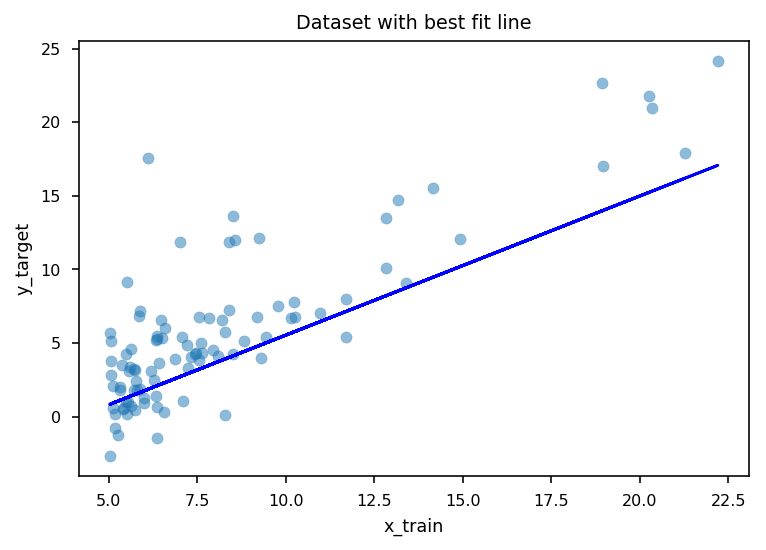

<Figure size 432x288 with 0 Axes>

In [11]:
l1, l2, l3 = LinearRegressModel(), LinearRegressModel(), LinearRegressModel()
l1.train(X_feat[:50], y_target[:50], 'r')
l2.train(X_feat[50:], y_target[50:], 'g')
l3.train(X_feat, y_target, 'b')


#### Calculating the MSE loss and plotting the Loss function of the model

-1.5245070651714387 0.7272806367436369
-5.269562110821536 1.1950188105895174
-3.9101234366796653 0.9451906941678065


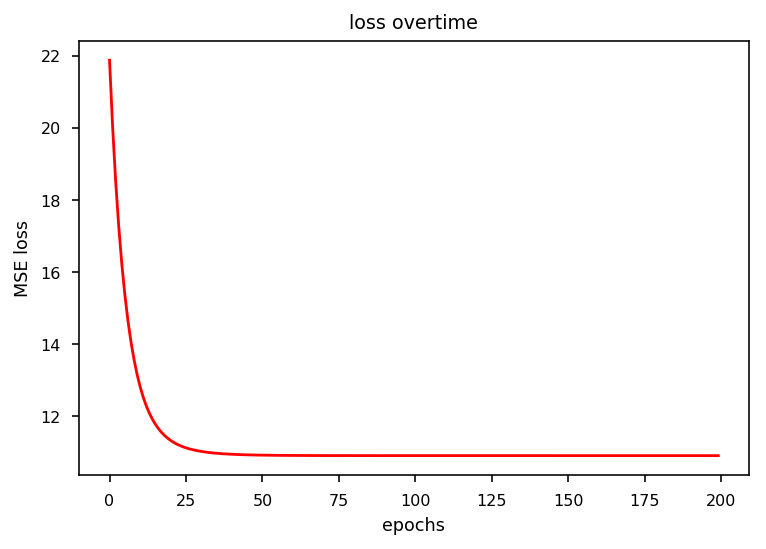

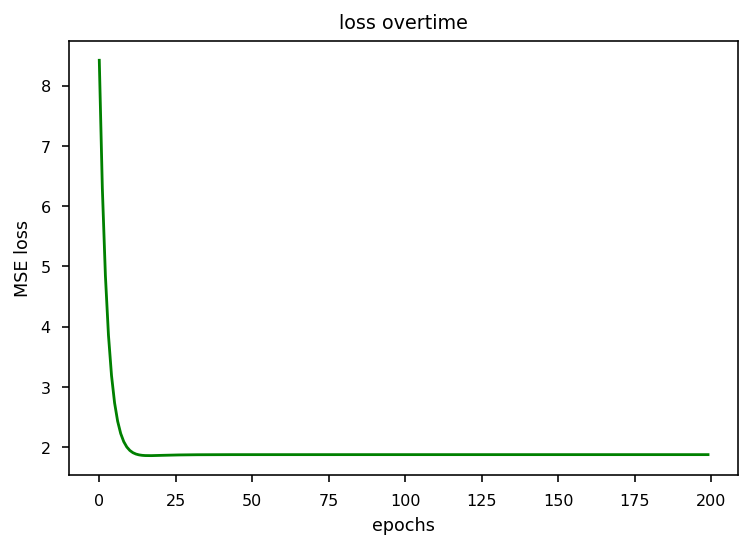

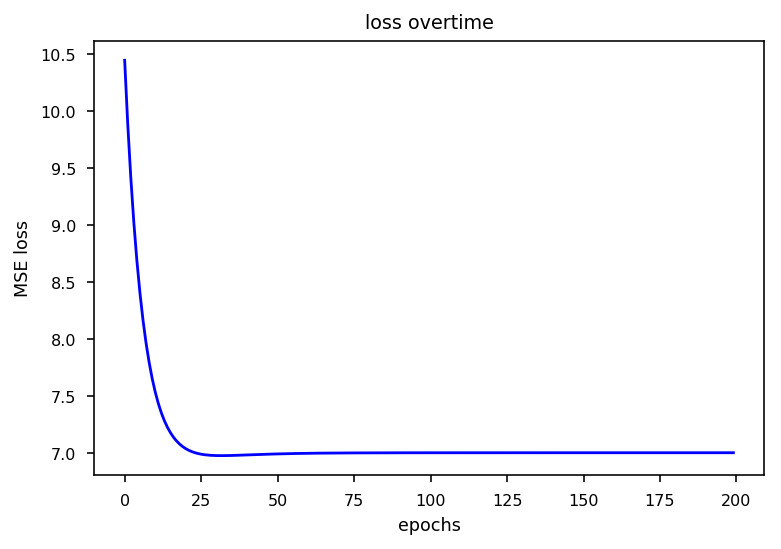

In [12]:
print(l1.theta_0, l1.theta_1)
print(l2.theta_0, l2.theta_1)
print(l3.theta_0, l3.theta_1)
l1.plot_mse_loss('r')
l2.plot_mse_loss('g')
l3.plot_mse_loss('b')

#### DIsplaying the best fit for all three trained model instances together

The MSE loss for l1 model after training is 7.105840577424994
The MSE loss for l2 model after training is 5.39851593638045
The MSE loss for l3 model after training is 7.0062443883342445


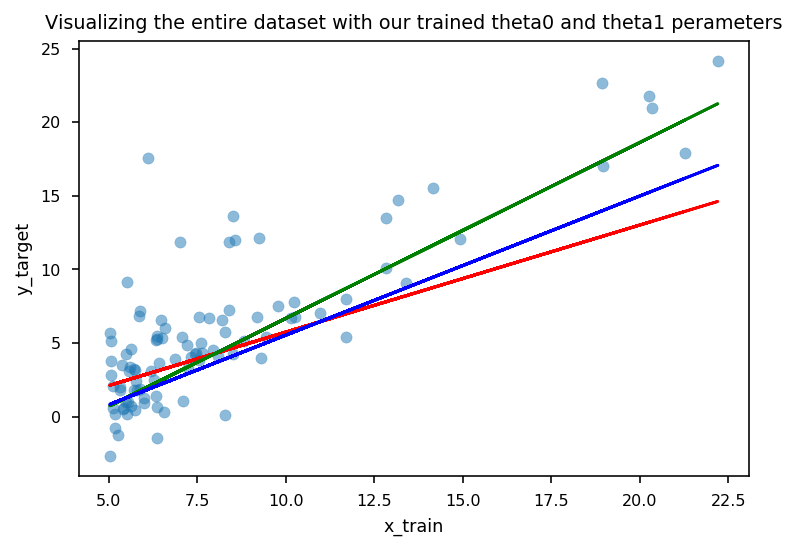

In [13]:
# Running the mse test with the line predicted by the trained model
print("The MSE loss for l1 model after training is", mse(y_target, y_pred(X_feat, l1.theta_0, l1.theta_1)))
print("The MSE loss for l2 model after training is", mse(y_target, y_pred(X_feat, l2.theta_0, l2.theta_1)))
print("The MSE loss for l3 model after training is", mse(y_target, y_pred(X_feat, l3.theta_0, l3.theta_1)))

plt.scatter(X_feat, y_target, alpha=0.5)
plt.plot(X_feat, y_pred(X_feat, l1.theta_0, l1.theta_1), color='r')
plt.plot(X_feat, y_pred(X_feat, l2.theta_0, l2.theta_1), color='g')
plt.plot(X_feat, y_pred(X_feat, l3.theta_0, l3.theta_1), color='b')
plt.xlabel('x_train')
plt.ylabel('y_target')
plt.title("Visualizing the entire dataset with our trained theta0 and theta1 perameters")
plt.show()

#### Creating a linear regression model with Scikit Learn for comparison

-3.0390335588000026 [1.23587292]
The MSE loss for the scikit model after training is 5.218160262220157


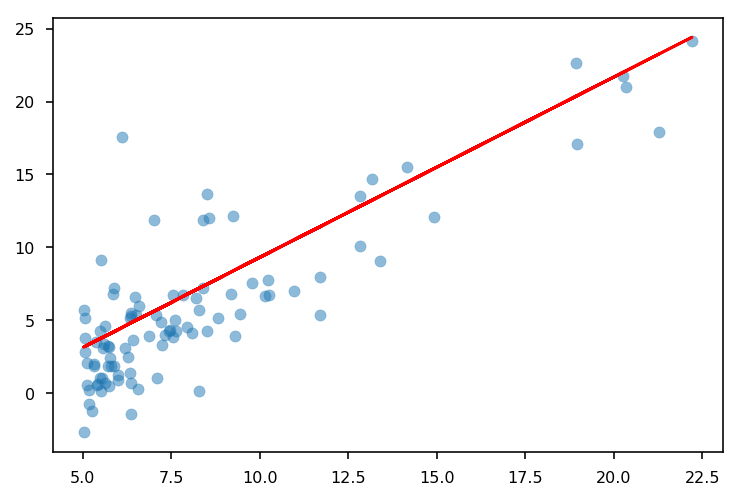

In [14]:
# Running the model generation with scikit learn
import numpy as np
from sklearn.linear_model import LinearRegression

X = X_feat[:50].reshape(-1, 1) 
reg = LinearRegression().fit(X, y_target[:50])
print(reg.intercept_, reg.coef_)
print("The MSE loss for the scikit model after training is", mse(y_target, y_pred(X_feat, reg.intercept_, reg.coef_)))

plt.scatter(X_feat, y_target, alpha=0.5)
plt.plot(X_feat, y_pred(X_feat, reg.intercept_, reg.coef_), color='r')

## Linear Regression with ridge regression

In [17]:
class LinearRegressRegModel:
    def __init__(self):
        # initialize the two params of the model to some random values
        self.theta_0 = np.random.random() * 10
        self.theta_1 = np.random.random()
        self.mse_loss = [] # for plotting the loss values over time

    def train(self, X_feat, y_target, color='b',learning_rate=0.05, epochs=200):
        '''func to train the linear regress model
            X_feat and y_target must be np arrays'''
        number_xdata = X_feat.size
        number_ydata = y_target.size
        if (number_xdata != number_ydata):
            raise("Test and target data dimensions do not match")
            
        lambda_f = 0.000001 # Penalty factor lambda in ridge regression
        for epoch in range(epochs):
            for xf, yt in zip(X_feat, y_target):
                '''Batch Gradient Descent Operation as we use our entire feat 
                and target set for calculating MSE for each epoch
                The Gradient Descent MSE func for linear regression has no local minima'''
                
                # Simultaneous update of parameters
                dm_dt0 = (1/number_xdata) * (y_pred(xf, self.theta_0, self.theta_1) - yt)
                dm_dt1 = (1/number_xdata) * (xf * (y_pred(xf, self.theta_0, self.theta_1) - yt)) + (2*lambda_f*self.theta_1)
                # Gradient descent update
                self.theta_0 -= learning_rate * dm_dt0
                self.theta_1 -= learning_rate * dm_dt1  
            
            # Calculating the MSE loss and saving it to the mse_loss arr
            self.mse_loss.append(mse(y_target, y_pred(X_feat, self.theta_0, self.theta_1)))
            if epoch % 20 == 0:
                plotter(X_feat, y_target, self.theta_0, self.theta_1, color=color)
                time.sleep(1)

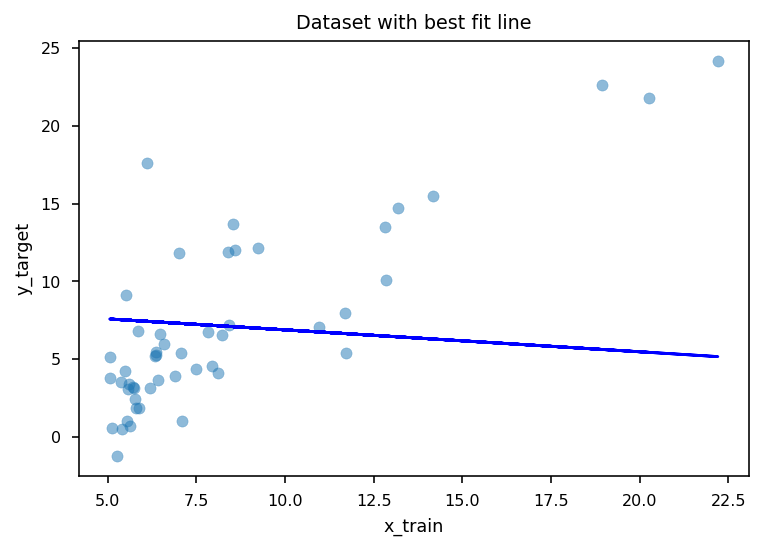

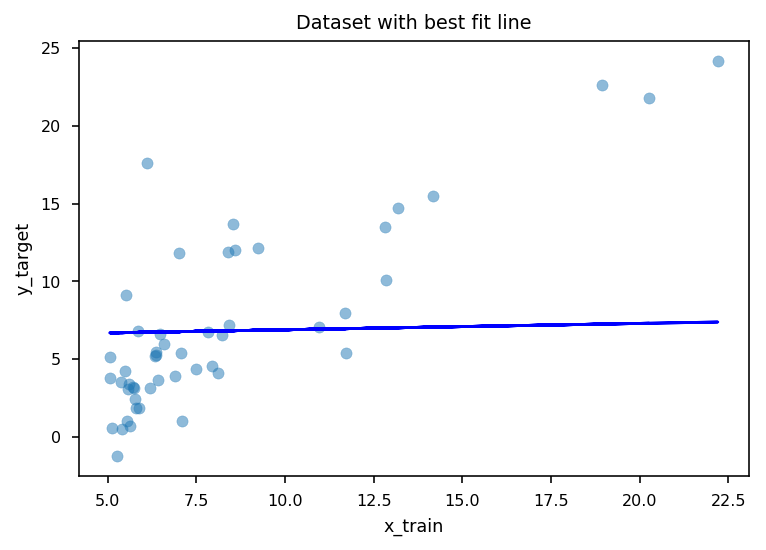

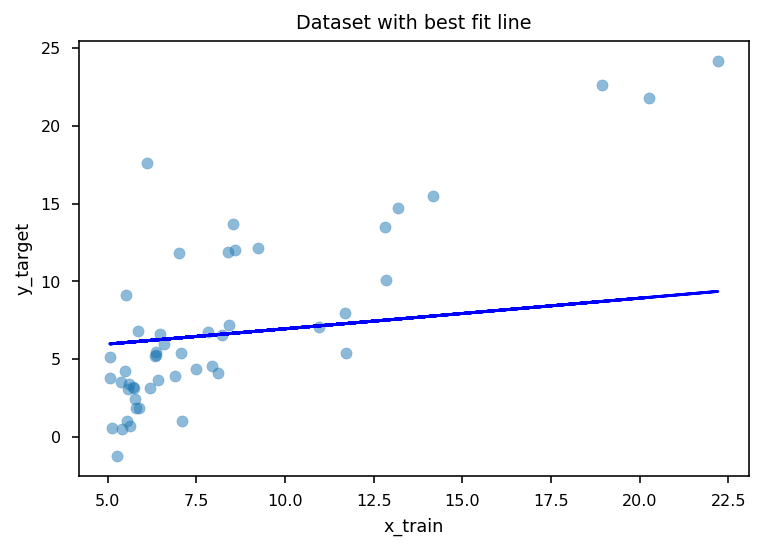

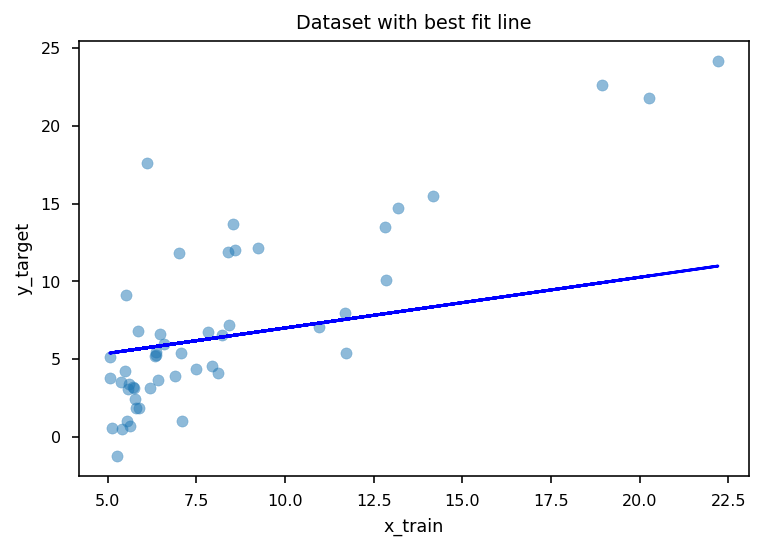

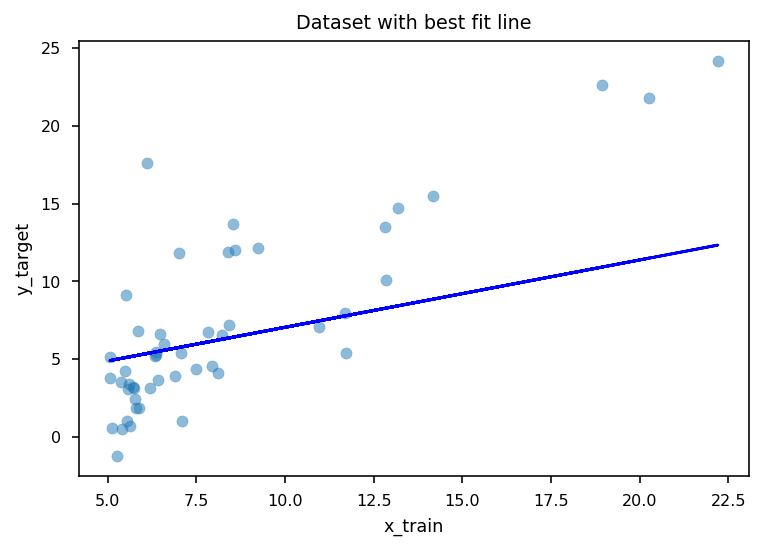

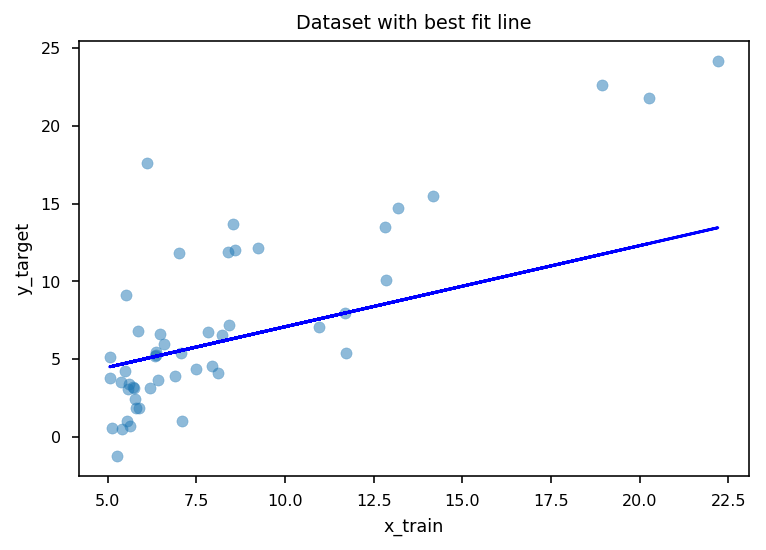

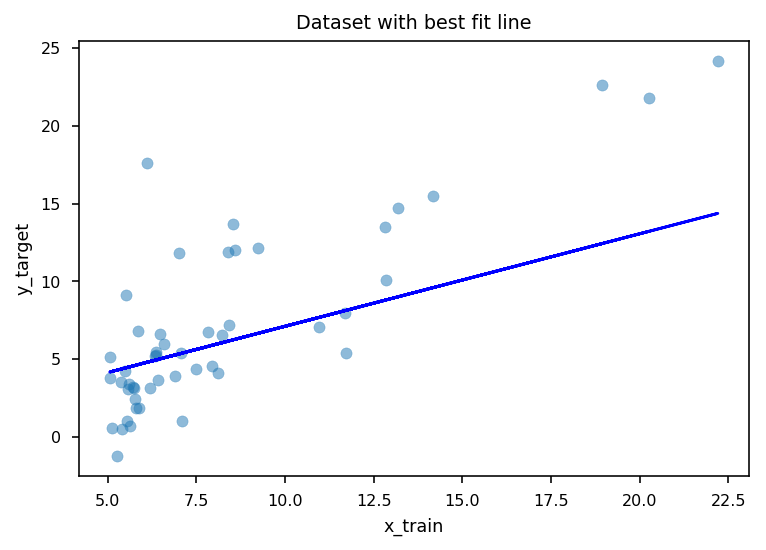

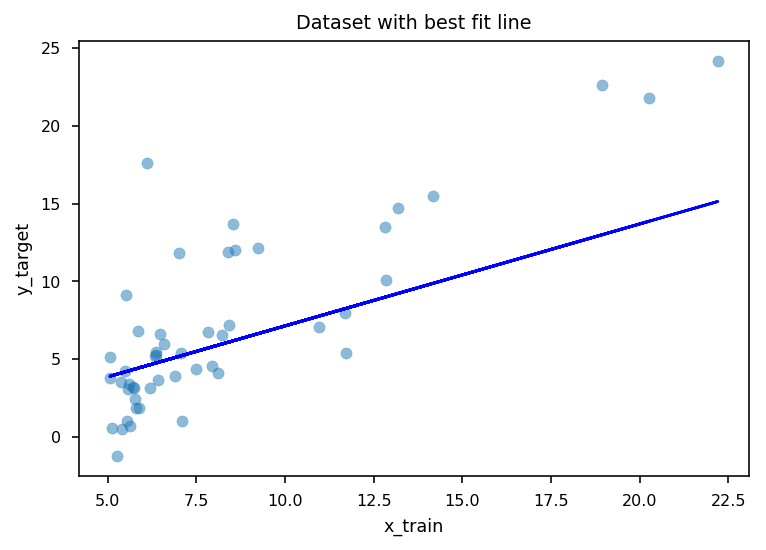

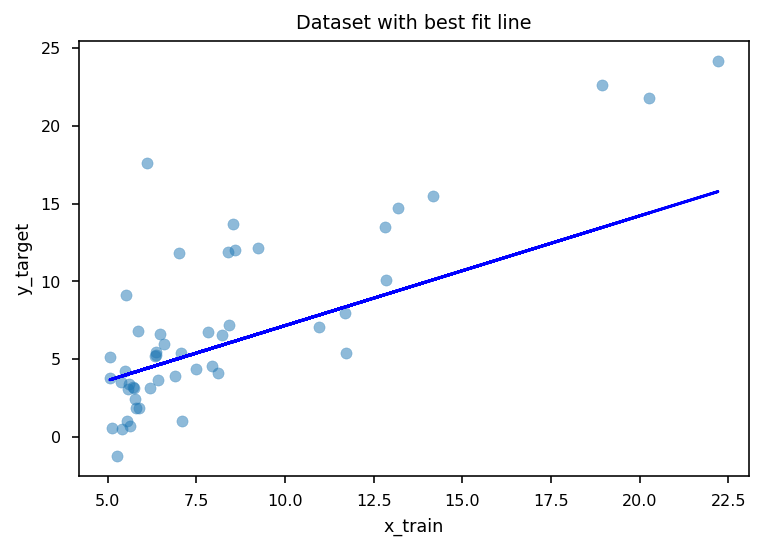

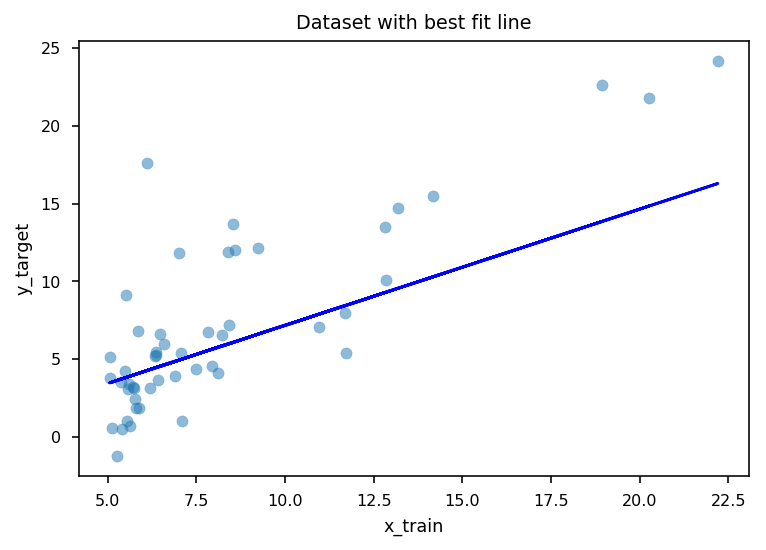

<Figure size 432x288 with 0 Axes>

In [16]:
l4 = LinearRegressRegModel()
l4.train(X_feat[:50], y_target[:50])